In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setting up our envionment

In [2]:
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 28.08 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [4]:
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=1bf99f522cc9449a1f5505e0d75886fcbc8dd94c720f875ce3e44512c346f01d
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-0fyiznj_/pycocotools_85f84c2e5d3e4bbdae061d05f412e984
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-0fyiznj_/pycocotools_85f84c2e5d3e4bbdae061d05f412e984
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263845 sha256=5823b739be69e68a29924dc024866b594fa1dd216df6f51b9659c897cae0973f
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [5]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

!pip install efficientnet_pytorch
!pip install tensorboardX

     | 91 kB 1.2 MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=a7a6f9a9eae9a63fc968416c8ac802f273d6ef7121ab617c632a1d06f3df3831
  Stored in directory: /tmp/pip-ephem-wheel-cache-y59wfqr1/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

# Loading Data 


In [ ]:
!curl -L "put your dataset link from roboflow" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [7]:
%ls

drive/                  README.dataset.txt   sample_data/  train/
Monk_Object_Detection/  README.roboflow.txt  test/         valid/


In [8]:
%ls train/

In [9]:
!mkdir Wildfire
!mkdir Wildfire/annotations
!mkdir Wildfire/Annotations
!mkdir Wildfire/Images

In [10]:
%cp train/_annotations.coco.json Wildfire/annotations/instances_Images.json

In [11]:
%cp train/*.jpg Wildfire/Images/

# Training the efficientDet-d0 model from backbone and train to our custom case.

In [12]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [13]:
from train_detector import Detector

In [14]:
gtf = Detector();

In [15]:
root_dir = "./";
coco_dir = "Wildfire";
img_dir = "./";
set_dir = "Images";

In [16]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [17]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [18]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [19]:
%%time
gtf.Train(num_epochs=30, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might caus


faild onnx export



CPU times: user 2h 20min 33s, sys: 3min 12s, total: 2h 23min 46s
Wall time: 2h 24min 16s


# Inference

In [20]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [21]:
from infer_detector import Infer

In [22]:
gtf = Infer();

In [23]:
gtf.Model(model_dir="trained/")

In [24]:
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [25]:
class_list

['Smoke', 'smoke']

In [26]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.176s)
CPU times: user 189 ms, sys: 29 ms, total: 218 ms
Wall time: 263 ms


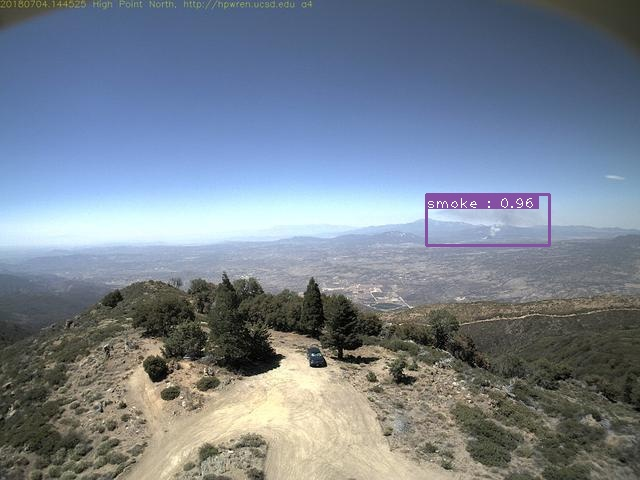

In [27]:
from IPython.display import Image
Image(filename='output.jpg') 

In [28]:
img_path1 = img_path
print(img_path)
print(img_path1)

test/ck0t7cczuqxtt07212nj5eznh_jpeg.rf.1a9299c8658d89f6271dba2aeefe074d.jpg
test/ck0t7cczuqxtt07212nj5eznh_jpeg.rf.1a9299c8658d89f6271dba2aeefe074d.jpg


In [29]:
%%time
duration, scores, labels, boxes = gtf.Predict(img_path1, class_list, vis_threshold=0.2);

Done. (0.153s)
CPU times: user 190 ms, sys: 7.94 ms, total: 198 ms
Wall time: 213 ms


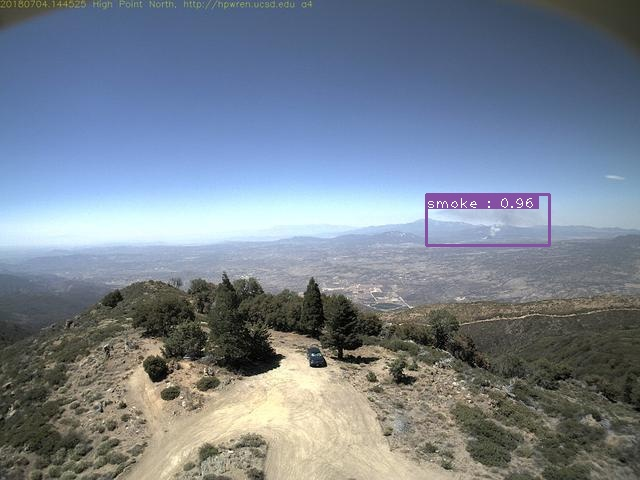

In [30]:
from IPython.display import Image
Image(filename='output.jpg') 